---
title : TP 2 - Optimisation Numérique
date : septembre 2021
author : CLARY Émilie, VAN BOXEM Rémi
---

# TP 2 - Optimisation Numérique


Membre :

- $m_1$ : CLARY Émilie
- $m_2$ : VAN BOXEM Rémi

## $\nabla$ - Méthode du gradiant

In [6]:
# Définition de la fonction gradiant
def gradiant(init_point, step, N, delta, epsilon, function):
    # Rappel des paramètres d'entrée de fonction
    show("Méthode du gradiant sur la fonction f",function) 
    show("Paramètres :\nPoint initial : ",init_point,"\npas = ",step, "\nTolérance delta = ",delta, "\net ",N, " itérations maximales.")
    show("Point initial : ",init_point)
    show("pas = ",step)
    show("Tolérance delta = ",delta)
    show("et ",N, " itérations maximales.")
    pn = [] # Liste des points de la suite
    
    pn.append(init_point)
    function_gradiant = f.gradient() # Calcul des dérivées de la fonction f
    pn.append((init_point[0] + (step * function_gradiant(init_point[0],init_point[1]))[0],init_point[1] + (step * function_gradiant(init_point[0],init_point[1]))[1]))
    i = 0
    cond = False
    while not (i == N or cond):
        pnx = pn[len(pn)-1][0] + (step * function_gradiant(pn[len(pn)-1][0],pn[len(pn)-1][1]))[0]
        pny = pn[len(pn)-1][1] + (step * function_gradiant(pn[len(pn)-1][0],pn[len(pn)-1][1]))[1]
        pn.append((n(pnx),n(pny)))
        cond = (vector([pn[len(pn)-1][0],pn[len(pn)-1][1]]).norm()  - vector([pn[len(pn)-2][0],pn[len(pn)-2][1]]).norm()) < delta and abs(function(pn[len(pn)-1][0],pn[len(pn)-1][1]) - function(pn[len(pn)-2][0],pn[len(pn)-2][1])) < epsilon
        i += 1
        show(i)
    # for i in range(N):
    return pn

    

### Question 1

'Méthode du gradiant sur la fonction f' (x, y) |--> (x^2*e^(2*x - 1) + 4*y^2)*e^(-x^2 - y^2)

'Paramètres :\nPoint initial : ' (1, 2) '\npas = ' 0.00100000000000000 '\nTolérance delta = ' 0.00100000000000000 '\net ' 100 ' itérations maximales.'

'Point initial : ' (1, 2)

'pas = ' 0.00100000000000000

'Tolérance delta = ' 0.00100000000000000

'et ' 100 ' itérations maximales.'

1

'Graphique de la fonction f' (x, y) |--> (x^2*e^(2*x - 1) + 4*y^2)*e^(-x^2 - y^2)

[(1, 2),
 (-0.00200000000000000*(e + 16)*e^(-5) + 0.00400000000000000*e^(-4) + 1,
  -0.00400000000000000*(e + 16)*e^(-5) + 0.0160000000000000*e^(-5) + 2),
 (0.999641796775774, 1.99920616257137)]

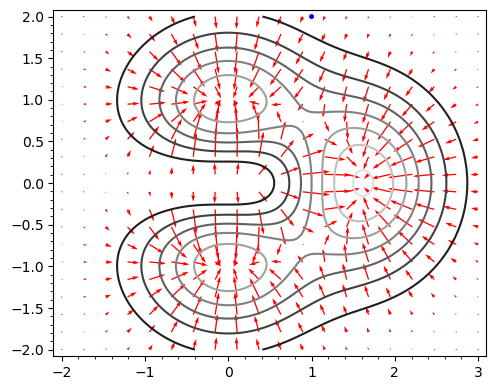

In [7]:
x, y = var('x y')
f(x,y) = (x^2*exp(2*x-1)+4*y^2)*exp(-x^2-y^2)
graph = contour_plot(f,(x,-2,3),(y,-2,2), fill = False)
graph += plot_vector_field((f.gradient()),(x,-2,3),(y,-2,2), color = "red")
grad = gradiant((1,2),0.001,100,0.001,0.001,f)
for dot in grad:
    graph += point(dot)
show("Graphique de la fonction f",f)
show(grad)
show(graph)

### Question 2
Recherche du minimum de la fonction de Rosenbrock

In [3]:
var('x y')
f(x, y) = (1 - x)^2 + 100 * (y - x^2)^2

graph = contour_plot(f,(x,-100,100),(y,-100,100), fill = False)
graph += plot_vector_field((f.gradient()),(x,-100,100),(y,-100,100), color = "red")
grad = gradiant((80,30),-0.001,36,0.001,0.001,f)
show(grad)
for dot in grad:
    graph += point(dot)
show(graph)


'Méthode du gradiant sur la fonction f' (x, y) |--> 100*(x^2 - y)^2 + (x - 1)^2

'Paramètres :\nPoint initial : ' (80, 30) '\npas = ' -0.00100000000000000 '\nTolérance delta = ' 0.00100000000000000 '\net ' 36 ' itérations maximales.'

'Point initial : ' (80, 30)

'pas = ' -0.00100000000000000

'Tolérance delta = ' 0.00100000000000000

'et ' 36 ' itérations maximales.'

[(80, 30),
 (-203760.158000000, 1304.00000000000),
 (3.38390205231074e15, 8.30364144083699e9),
 (-1.54993449081733e46, 2.29015861992657e30),
 (1.48936114500836e138, 4.80459385165036e91),
 (-1.32147834328200e414, 4.43639324052120e275),
 (9.23081701524022e1241, 3.49261002352666e827),
 (-3.14615718870792e3725, 1.70415965537697e2483),
 (1.24566494432570e11176, 1.97966101121171e7450),
 (-7.73149927085270e33527, 3.10336230704392e22351),
 (1.84863490589663e100583, 1.19552161950392e67055),
 (-2.52704769442979e301749, 6.83490203059892e201165),
 (6.45506035654217e905247, 1.27719400998458e603498),
 (-1.07587276431280e2715743, 8.33356084132046e1810494),
 (4.98130038792325e8147228, 2.31500440998012e5431485),
 (-4.94411070751302e24441685, 4.96267071094487e16294456),
 (4.83419930728701e73325056, 4.88884613762897e48883370),
 (-4.51890953010591e219975169, 4.67389658851484e146650112),
 (3.69114351659439e659925508, 4.08410866825639e439950338),
 (-2.01160536743457e1979776525, 2.72490809201936e1319851016),
 (3.25602963183935e5939329575, 8.09311230858318e3959553049),
 (-1.38078174614446e17817988726, 2.12034579268318e11878659150),
 (1.05301632104649e53453966178, 3.81311646097151e35635977451),
 (-4.67052067444475e160361898533, 2.21768674478055e106907932355),
 (4.07526531235891e481085695600, 4.36275267408317e320723797066),
 (-2.70724559072657e1443257086801, 3.32155747322316e962171391200),
 (7.93675467524467e4329771260403, 1.46583573770169e2886514173602),
 (-1.99981057589595e12989313781211, 1.25984149550036e8659542520807),
 (3.19909085041342e38967941343633, 7.99848467893059e25978627562421),
 (-1.30960315435430e116903824030900, 2.04683645383978e77935882687266),
 (8.98419415368619e350711472092699, 3.43012084378945e233807648061799),
 (-2.90066368266420e1052134416278099, 1.61431489182258e701422944185399),
 (9.76229941841589e3156403248834297, 1.68276995998540e2104268832556198),
 (-3.72148576825647e9469209746502893, 1.90604979869607e6312806497668595),
 (2.06162218421529e28407629239508680, 2.76989126466709e18938419493005786),
 (-3.50499358785330e85222887718526040, 8.50057206089727e56815258479017359),
 (1.72235105221140e255668663155578121, 2.45699601017856e170445775437052080),
 (-2.04373703728235e767005989466734363, 5.93298629410743e511337326311156241)]

/usr/lib/python3.9/site-packages/sage/repl/rich_output/display_manager.py:608: RichReprWarning: Exception in _rich_repr_ while displaying object: Axis limits cannot be NaN or Inf
  warnings.warn(


ValueError: Axis limits cannot be NaN or Inf

### Question 3

In [ ]:
var('x y z')
eq1 = 2*cos(y*z) - 2*x == 1
eq2 = x^2 - y^2 + 2*y == 1
eq3 = 1*exp(-x*y) + z == sqrt(2)

f(x, y, z) = (2*cos(x*y)-2*x-1)^2 + (x^2-y^2+2*y-1)^2 + (exp(-x*y)+z-sqrt(2))^2
show(gradiant((0,0),-0.01,1000,0.01,0.01,f))



show(solve([eq1,eq2,eq3],x,y,z))

## $\mathcal{H}$ - Méthode de Newton

### Question 4
